In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Cleaning

In [4]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [5]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [6]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [7]:
df['country'].fillna('PRT',inplace=True)

In [8]:
df['company'].fillna(0,inplace=True)

In [9]:
df['agent'].fillna(df['agent'].mean(),inplace=True)

In [10]:
df['children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [11]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
df['children'].fillna(0,inplace=True)

In [13]:
df.isna().sum().sort_values(ascending=False).head()

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

### EDA 

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='count'>

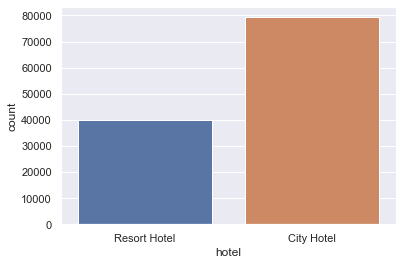

In [16]:
sns.countplot(x='hotel',data=df)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

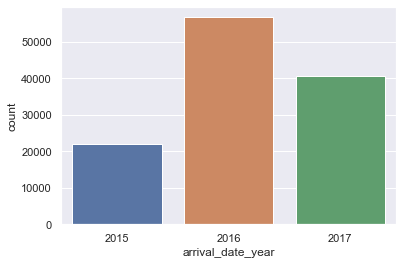

In [17]:
sns.countplot(x='arrival_date_year',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

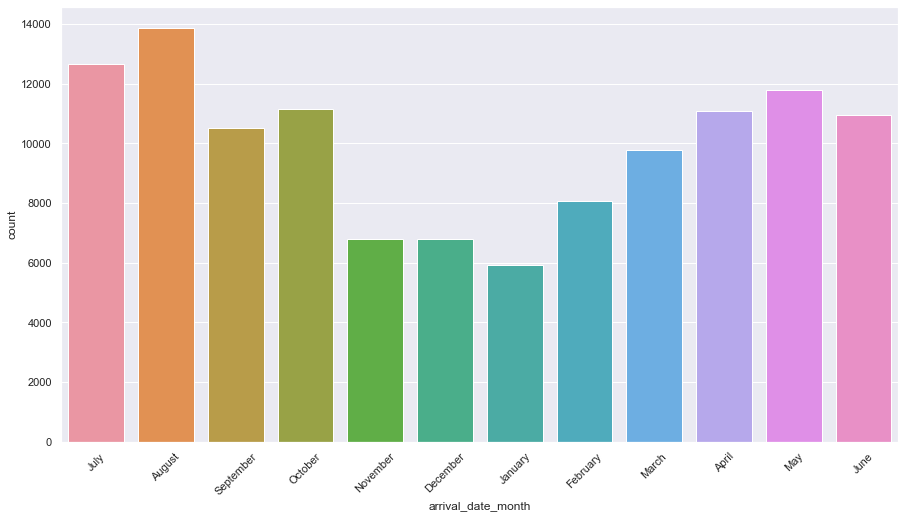

In [18]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'arrival_date_month',data = df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='hotel', ylabel='count'>

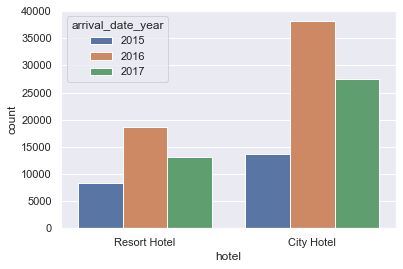

In [19]:
sns.countplot(x = "hotel", hue = "arrival_date_year", data = df)

In [20]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [21]:
df['is_canceled'].replace({0:"NO",1:"YES"},inplace=True)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

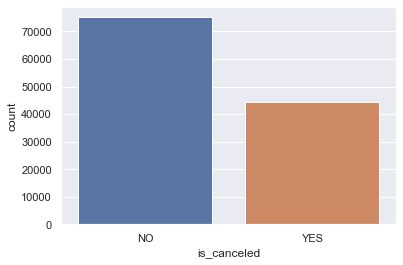

In [22]:
sns.countplot(x='is_canceled',data=df)

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

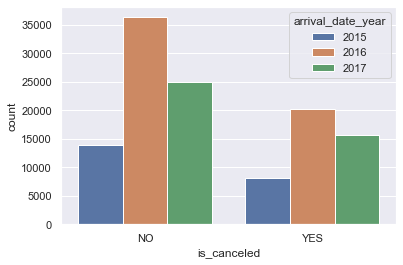

In [23]:
sns.countplot(x = "is_canceled", hue = "arrival_date_year", data = df)

In [24]:
df.groupby(["hotel"])["is_canceled"].agg(["value_counts"])

value_counts
hotel        is_canceled              
City Hotel   NO                  46228
             YES                 33102
Resort Hotel NO                  28938
             YES                 11122

<AxesSubplot:xlabel='hotel', ylabel='count'>

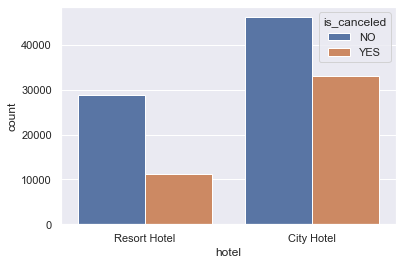

In [25]:
sns.countplot(x = "hotel", hue = "is_canceled", data = df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [28]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

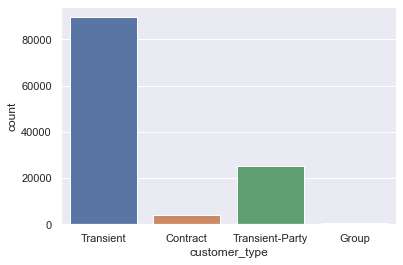

In [29]:
sns.countplot(x='customer_type',data=df)

([<matplotlib.patches.Wedge at 0x2d26c774be0>,
 [Text(-0.8146799318246912, 0.8116628663935026, 'Transient'),
  Text(0.7094511662268436, -0.9050851024844966, 'Transient-Party'),
  Text(1.1391270029753517, -0.15776460658967034, 'Contract'),
  Text(1.1498674522190366, -0.017459734456780313, 'Group')],
 [Text(-0.4604712658139558, 0.45876596796154484, '75.06%'),
  Text(0.40099413743256374, -0.5115698405347153, '21.04%'),
  Text(0.6438543929860683, -0.08917129937677017, '3.41%'),
  Text(0.6499250816890207, -0.009868545562528003, '0.48%')])

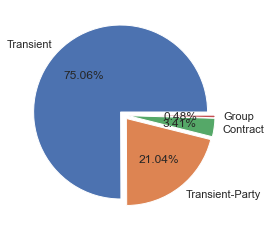

In [30]:
labels = ['Transient','Transient-Party','Contract','Group']
plt.pie(df['customer_type'].value_counts(),labels=labels,explode = (0.05, 0.05, 0.05, 0.05),autopct = "%.2f%%")

In [31]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

<AxesSubplot:xlabel='meal', ylabel='count'>

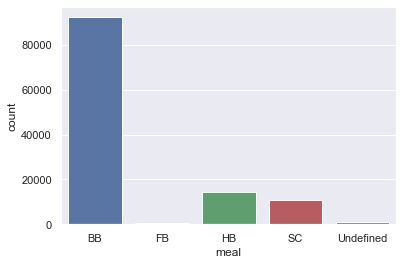

In [32]:
sns.countplot(x='meal',data=df)

In [33]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

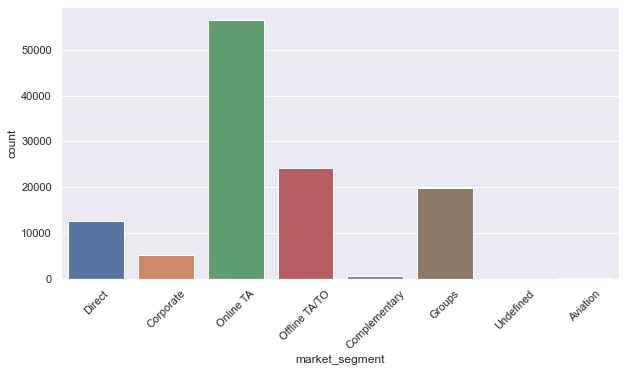

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x='market_segment',data=df)
plt.xticks(rotation=45)

In [35]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

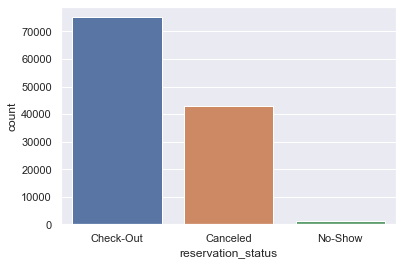

In [36]:
sns.countplot(x='reservation_status',data=df)

In [37]:
df.groupby(['hotel'])['country'].agg(['value_counts'])

value_counts
hotel        country              
City Hotel   PRT             30984
             FRA              8804
             DEU              6084
             GBR              5315
             ESP              4611
...                            ...
Resort Hotel TGO                 1
             TUN                 1
             UGA                 1
             UZB                 1
             ZMB                 1

[291 rows x 1 columns]

In [38]:
df.groupby(["hotel"])["market_segment"].agg(["value_counts"])

value_counts
hotel        market_segment              
City Hotel   Online TA              38748
             Offline TA/TO          16747
             Groups                 13975
             Direct                  6093
             Corporate               2986
             Complementary            542
             Aviation                 237
             Undefined                  2
Resort Hotel Online TA              17729
             Offline TA/TO           7472
             Direct                  6513
             Groups                  5836
             Corporate               2309
             Complementary            201

<AxesSubplot:xlabel='hotel', ylabel='count'>

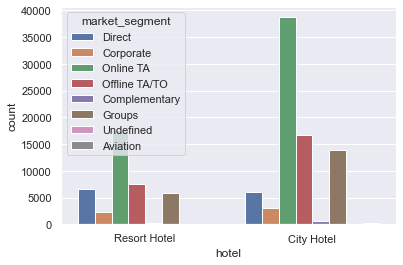

In [39]:
sns.countplot(x='hotel',hue='market_segment',data=df)

<AxesSubplot:xlabel='hotel', ylabel='count'>

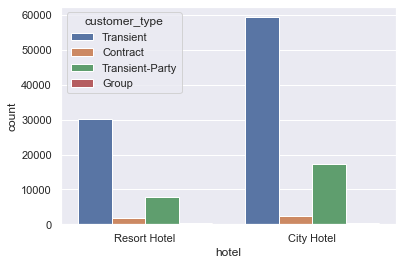

In [40]:
sns.countplot(x='hotel',hue='customer_type',data=df)

In [41]:
df['days_in_waiting_list'].sort_values(ascending=False).unique()

array([391, 379, 330, 259, 236, 224, 223, 215, 207, 193, 187, 185, 183,
       178, 176, 175, 174, 167, 165, 162, 160, 154, 150, 147, 142, 125,
       122, 121, 120, 117, 116, 113, 111, 109, 108, 107, 105, 101, 100,
        99,  98,  97,  96,  93,  92,  91,  89,  87,  85,  84,  83,  81,
        80,  79,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  28,  27,  26,  25,  24,
        23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,
        10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0], dtype=int64)

<AxesSubplot:xlabel='hotel', ylabel='count'>

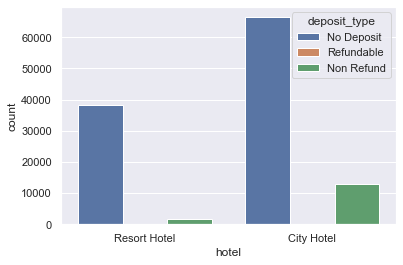

In [42]:
sns.countplot(x='hotel',hue='deposit_type',data=df)

In [43]:
df.groupby(["hotel"])["distribution_channel"].agg(["value_counts"])

value_counts
hotel        distribution_channel              
City Hotel   TA/TO                        68945
             Direct                        6780
             Corporate                     3408
             GDS                            193
             Undefined                        4
Resort Hotel TA/TO                        28925
             Direct                        7865
             Corporate                     3269
             Undefined                        1

<AxesSubplot:xlabel='hotel', ylabel='count'>

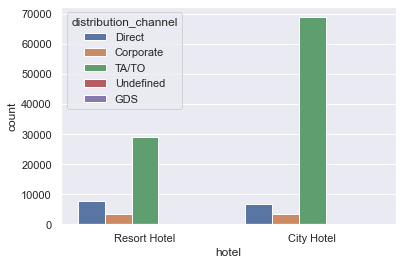

In [44]:
sns.countplot(x = "hotel", hue = "distribution_channel", data = df)

In [45]:
df.groupby(["hotel"])["reservation_status"].agg(["value_counts"])

value_counts
hotel        reservation_status              
City Hotel   Check-Out                  46228
             Canceled                   32186
             No-Show                      916
Resort Hotel Check-Out                  28938
             Canceled                   10831
             No-Show                      291

<AxesSubplot:xlabel='hotel', ylabel='count'>

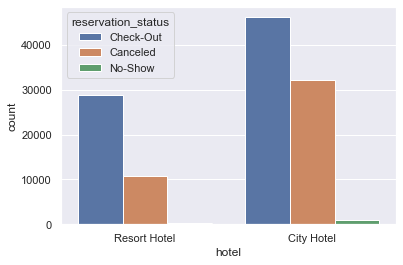

In [46]:
sns.countplot(x = "hotel", hue = "reservation_status", data = df)

In [47]:
df['is_repeated_guest'].replace({0:"NO",1:"YES"},inplace=True)

In [48]:
df.groupby(["hotel"])["is_repeated_guest"].agg(["value_counts"])

value_counts
hotel        is_repeated_guest              
City Hotel   NO                        77298
             YES                        2032
Resort Hotel NO                        38282
             YES                        1778

<AxesSubplot:xlabel='hotel', ylabel='count'>

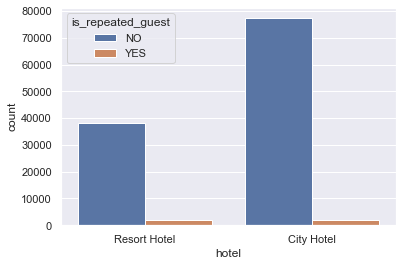

In [49]:
sns.countplot(x ="hotel", hue = "is_repeated_guest", data = df)